<div style = "background-color: grey;
            color: white; 
            margin: 30px auto;
            padding: 20px;
            border-radius: 10px">
<h1>Gen Experiment platform assignment</h1>
</div>

<h2>01 Initial questions </h2>

<div class="alert alert-block alert-info"><h3>01-1 Q What is suspicious?</h3></div>

-  Number of Experiments launched per month is increasing, but the impact metrics do not correlate
-  The Estimated Impact of Successful Experiments fluctuates significantly, some months even in negative numbers.
-  Estimated Risk Mitigated also in negative values for several months

<div class="alert alert-block alert-info"><h3>01-2 Q Figure out what is the problem?</h3></div>

-  Check formulas used to calculate estimated impact estimated risk mitigated
-  Check user´s fraction in experiments vs estimated impact. If it is small, it does not reveal quality data – the data are not properly revealing the problem and such experiments should be excluded
-  Maybe issue with experiment configuration, web analytics tracking…
-  Maybe some external influence - competition introduced crazy discounts during experiments, negative news on the brand etc
-  Maybe technical issue related to specific OS, browser

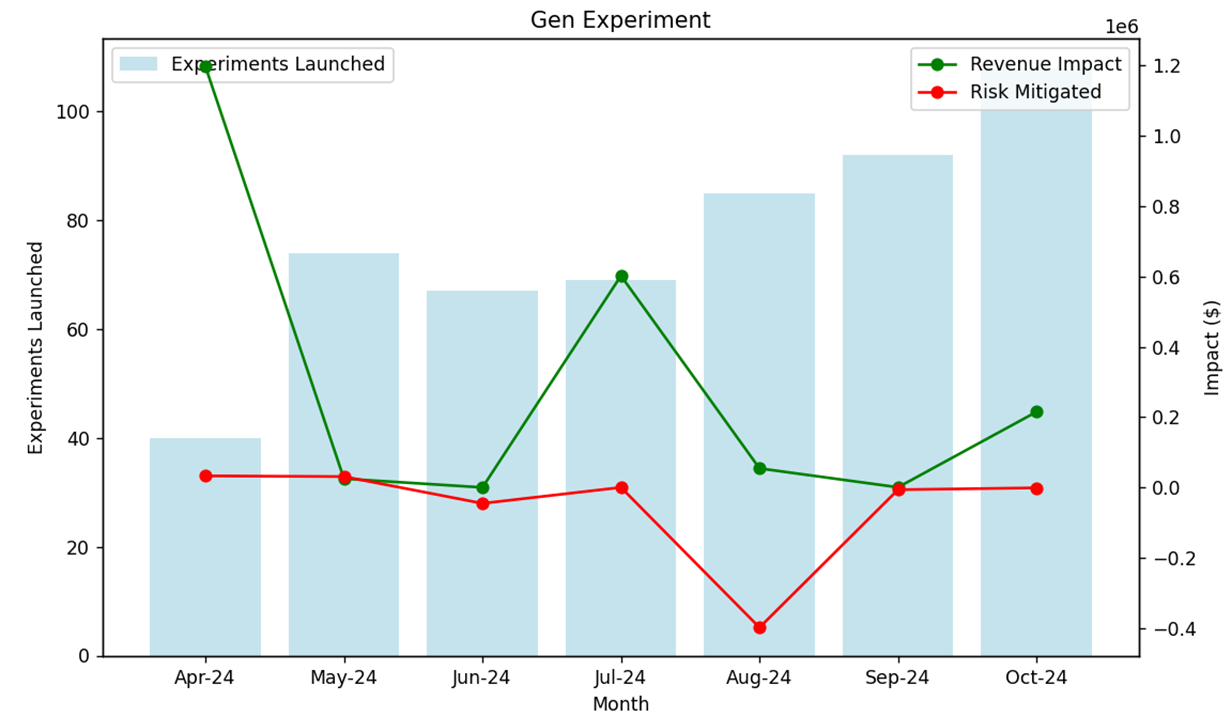![image.png]

<div style = "border: 1px solid black; background-color: #F0E5AD; padding: 10px;">
<h4>01-3 code supporting Q/A 1-2</h4></div>

Summary Statistics:
       Experiments Launched  Estimated Impact (Revenue)  \
count              7.000000                7.000000e+00   
mean              76.428571                2.990887e+05   
std               21.562754                4.508707e+05   
min               40.000000               -4.200000e+01   
25%               68.000000                1.259500e+04   
50%               74.000000                5.410000e+04   
75%               88.500000                4.084965e+05   
max              108.000000                1.197380e+06   

       Estimated Risk Mitigated  
count                  7.000000  
mean              -55419.142857  
std               153549.404836  
min              -398536.000000  
25%               -25931.500000  
50%                -1203.000000  
75%                15429.000000  
max                32810.000000  
Anomalies Detected:
    Month  Experiments Launched  Estimated Impact (Revenue)  \
2  Jun-24                    67                         -42

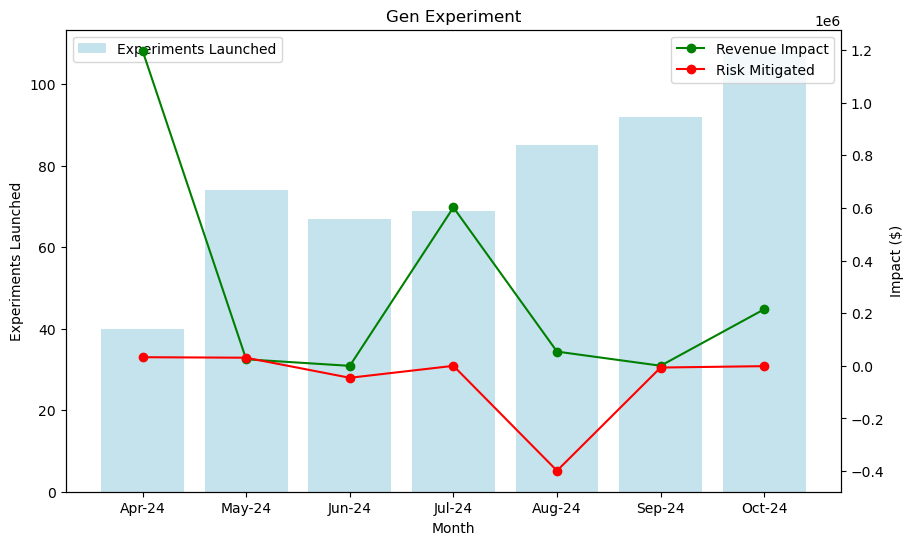


Calculated Metrics:
Success Rate (Positive Revenue Impact): 0.8571428571428571
Average Revenue Impact: 299088.71428571426
Risk Reduction Efficiency: -725.1102803738318


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Month": ["Apr-24", "May-24", "Jun-24", "Jul-24", "Aug-24", "Sep-24", "Oct-24"],
    "Experiments Launched": [40, 74, 67, 69, 85, 92, 108],
    "Estimated Impact (Revenue)": [1197380, 24837, -42, 601995, 54100, 353, 214998],
    "Estimated Risk Mitigated": [32810, 30858, -45393, 0, -398536, -6470, -1203]
}

df = pd.DataFrame(data)

# Basic Analysis
def basic_summary(df):
    print("Summary Statistics:")
    print(df.describe())

# Identify anomalies
def detect_anomalies(df):
    anomalies = df[(df["Estimated Impact (Revenue)"] < 0) | (df["Estimated Risk Mitigated"] < 0)]
    return anomalies

# Visualize trends
def visualize_trends(df):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot experiments launched
    ax1.bar(df["Month"], df["Experiments Launched"], color="lightblue", alpha=0.7, label="Experiments Launched")
    ax1.set_ylabel("Experiments Launched")
    ax1.set_xlabel("Month")
    ax1.legend(loc="upper left")

    # Plot revenue impact on a secondary axis
    ax2 = ax1.twinx()
    ax2.plot(df["Month"], df["Estimated Impact (Revenue)"], color="green", marker="o", label="Revenue Impact")
    ax2.plot(df["Month"], df["Estimated Risk Mitigated"], color="red", marker="o", label="Risk Mitigated")
    ax2.set_ylabel("Impact ($)")
    ax2.legend(loc="upper right")

    plt.title("Gen Experiment")
    plt.show()

# Metrics for quality assessment
def calculate_metrics(df):
    metrics = {
        "Success Rate (Positive Revenue Impact)": (df["Estimated Impact (Revenue)"] > 0).mean(),
        "Average Revenue Impact": df["Estimated Impact (Revenue)"].mean(),
        "Risk Reduction Efficiency": df["Estimated Risk Mitigated"].sum() / df["Experiments Launched"].sum()
    }
    return metrics

# Execute analysis
basic_summary(df)
anomalies = detect_anomalies(df)
print("Anomalies Detected:")
print(anomalies)
visualize_trends(df)
metrics = calculate_metrics(df)
print("\nCalculated Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value}")


<h2>02 Measuring Quality and Impact on the Platform</h2>

<div class="alert alert-block alert-info"><h3> 02-1 Proposed Enhanced data structure </h3></div>
Originally used tables and metrics were enhanced. Suggested final state is shown here bellow. <br><br>

original metrics & tables = highlighted green <br>
newly added metrics & tables = highlighted blue<br><br>

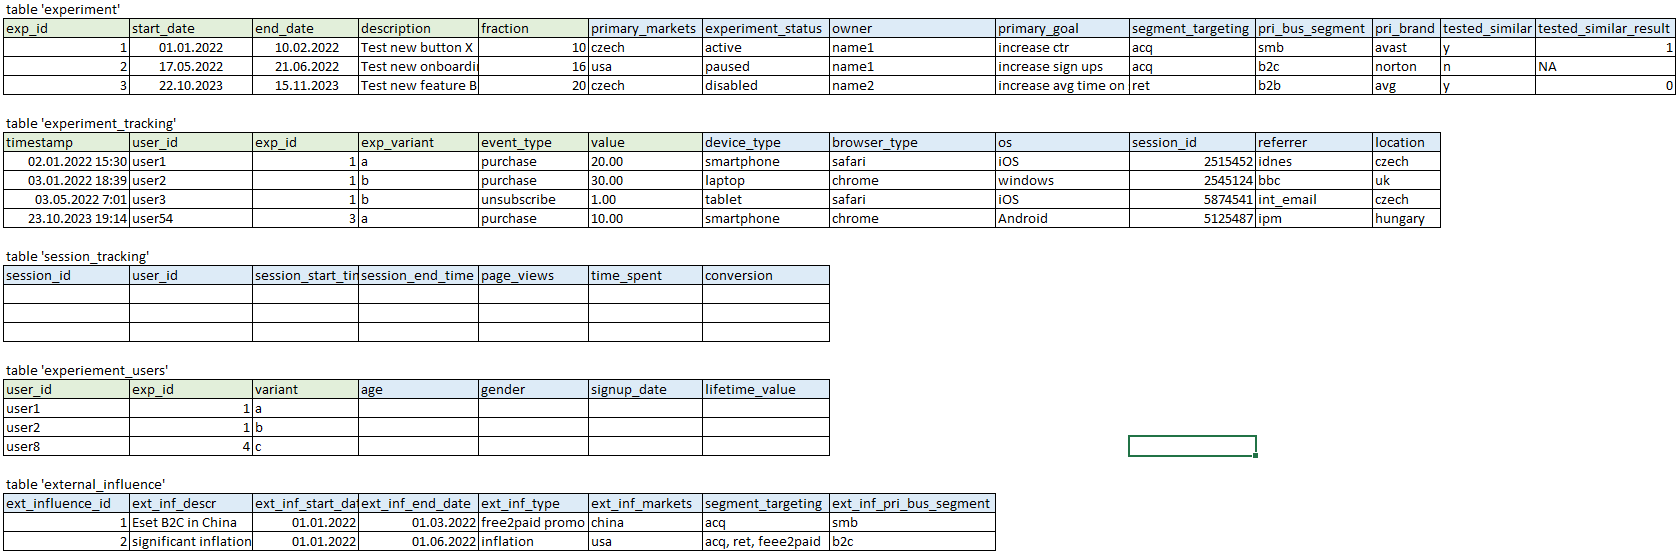

<div class="alert alert-block alert-info"><h3> 02-2 Proposed Enhanced data structure - main benefits</h3></div>

-  <b>different views & more segmentation</b> (e.g. device type etc)
-  <b>more quality and granular data output</b>
-  <b>mitigation of internal factors</b> (mainly thanks to enhanced table 'experiment' which now considers these extra metrics and avoids e.g. overlaps with internal brands, segments etc )
-  <b>mitigation of external factors</b> (<font color ="red">detailed in point 02-3</font>)
-  <b>threshold setup</b> that can be useful for running/stopping ongoing tests (e.g. once certain threshold level is reached, test can be terminated
-  <b>threshold alerts</b> - possibility to be informed on certain metrics and their values via services such as Lambda & SNS (in case AWS cloud is used - not sure here of the setup), or via any other function & notification service use
-  <b>session evaluation</b> - allowing greater detail and understanding of users behaviour during different sessions, in relation tho the experiemnt...e.g. with experiment ID = 2 & exp_var A user converts

<br>




<div class="alert alert-block alert-info"><h3> 02-3 Enhanced data structure - example with eliminating external influence</h3></div>

In this part of the proposal I suggest to <b>eliminate possible external influence causes</b>, that may otherwise harm actual experiment result data - if not considered. Adding a structure with example values bellow. Pls note, that some metrics are added within the main (now enhanced) table 'experiment' too, so we can evaluate each and every single experiment with each external influence in the script. <br><br>Data for this table should be ideally provided daily by BI, or by local teams.<br>

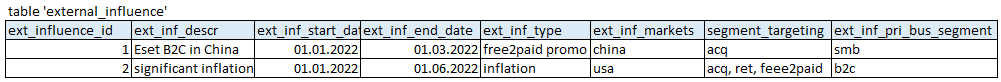

So, for the calculation, there is this new table with bellow metrics now considered into the script. The script basically evaluates whether each experiemnt is/is not influenced by external factors. It provides True/ False value as a result and I think it would be useful to run it daily - to indicate possible harm and allow for a deeper check.<br>

a new table 'external_influence' with following metrics:<br>

`ext_influence_id` - ID of the external event<br>
`ext_inf_descr`	- Description of the external event<br>
`ext_inf_start_date`- start of the external event	<br>
`ext_inf_end_date` - expected end date of the external event<br>
`ext_inf_type` - external event type, e.g. free2paid promo, inflation, etc	<br>
`ext_inf_markets` - external event markets affected	<br>
`segment_targeting`	- segments affected by the external event<br>
`ext_inf_pri_bus_segment` - external influence primary business segment, e.g. B2C, SMB, etc

Note: There can be a similar approach used for eliminating internal factors.

<div style = "border: 1px solid black; background-color: #F0E5AD; padding: 10px">
<h4>02-4 Evaluating external influence, provided code</h4></div>


In [ ]:
import pandas as pd
from datetime import datetime

# data
data_experiment = {
    'exp_id': [1, 2, 3],
    'start_date': [datetime(2022, 1, 1), datetime(2022, 5, 17), datetime(2023, 10, 22)],
    'end_date': [datetime(2022, 2, 10), datetime(2022, 6, 21), datetime(2023, 11, 15)],
    'description': ['Test new button X', 'Test new onboarding flow', 'Test new feature B'],
    'fraction': [10, 16, 20],
    'primary_markets': ['czech', 'usa', 'czech'],
    'experiment_status': ['active', 'active', 'disabled'],
    'owner': ['name1', 'name1', 'name2'],
    'primary_goal': ['increase ctr', 'increase sign ups', 'increase avg time on site'],
    'segment_targeting': ['acq', 'acq', 'ret'],
    'pri_bus_segment': ['smb', 'b2c', 'b2b'],
    'pri_brand': ['avast', 'norton', 'avg'],
    'tested_similar': ['y', 'n', 'y'],
    'tested_similar_result': [1, 'NA', 0]
}

data_external_influence = {
    'ext_influence_id': [1, 2],
    'ext_inf_descr': ['Eset B2C in China', 'significant inflation in USA'],
    'ext_inf_start_date': [datetime(2022, 1, 1), datetime(2022, 1, 1)],
    'ext_inf_end_date': [datetime(2022, 3, 1), datetime(2022, 6, 1)],
    'ext_inf_type': ['free2paid promo', 'inflation'],
    'ext_inf_markets': ['china', 'usa'],
    'segment_targeting': ['acq', 'acq, ret, feee2paid'],
    'ext_inf_pri_bus_segment': ['smb', 'b2c']
}

experiment_df = pd.DataFrame(data_experiment)
external_influence_df = pd.DataFrame(data_external_influence)

def date_overlap(start1, end1, start2, end2):
        return max(start1, start2) <= min(end1, end2)


def check_external_influence(experiment_df, external_influence_df):
    for _, exp_row in experiment_df.iterrows():
        if exp_row['experiment_status'] != 'active':
            continue

        for _, ext_row in external_influence_df.iterrows():
            if not date_overlap(exp_row['start_date'], exp_row['end_date'], ext_row['ext_inf_start_date'], ext_row['ext_inf_end_date']):
                continue

            if set(exp_row['primary_markets'].split(',')).intersection(ext_row['ext_inf_markets'].split(',')):
                return True
    return False

result = check_external_influence(experiment_df, external_influence_df)
print(f"There is a likely probability of the experiemnt being affected by extenal influence: {result}")

<div class="alert alert-block alert-info"><h3>02-5 Other proposals for improvement</h3></div>

-  Consider % of experiments with sufficient sample size to detect meaningful differences, or even remove small experiments at all
-  Consider proportion of experiments with statistically significant results. If result is not statistically clear, do not consider these.
-  Validate data in real time, segment by OS, browsers, test type, etc. in RT fully controlled environment (100% internal tests, e.g. via employees)
-  Run Q/A for participants and get their feedback (in exchange for e.g. coupons)
-  Post test analysis using ML, e.g. via Amazon Bedrock for anomalies with new enhanced views thanks to added metrics and tables